In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

from pandas.api.types import CategoricalDtype
from astropy.io import fits

In [2]:
#Importer le fichier fits et le convertir en Data frame
with fits.open('../ID004.fits') as hdul:
     data = hdul[1].data
     df = pd.DataFrame(data)

In [3]:
#Conversion des Date en type : datetime
df['UTC_DATE'] = pd.to_datetime(df['UTC_DATE'], errors='coerce')
df['LOC_DATE'] = pd.to_datetime(df['LOC_DATE'], errors='coerce')
df['LOCTIME']= pd.to_datetime(df['LOCTIME'], errors='coerce')
#Mettre l'index a l'heure de la Reunion
df = df.set_index('LOC_DATE') 

In [4]:
#date = '2024-02-21'
start = '2024-07-02 18:00'
end ='2024-07-09 06:00'
#period = df.loc[date] #selection de la periode a visualiser
period = df.loc[start:end]
night = period[period['ALT_SUN'] <= -16].copy()

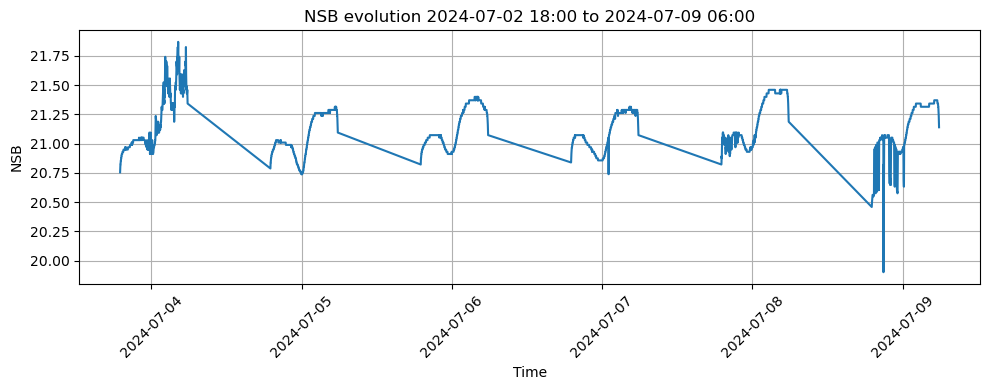

In [5]:
#Visualisation en considerant que la nuit correspont a une elevation du Soleil < -6

plt.figure(figsize=(10, 4))
plt.plot(night.index, night['NSB'])
plt.title(f"NSB evolution {start} to {end}")
plt.xlabel("Time")
plt.ylabel("NSB")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2851/2823639209.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period.loc[:, 'sun_phase'] = pd.cut(period['ALT_SUN'], bins=bins, labels=cat_type.categories, right=False).astype(cat_type)


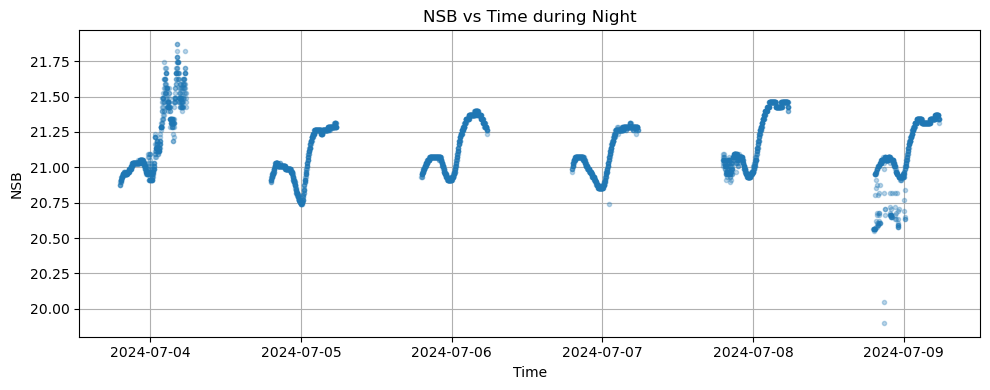

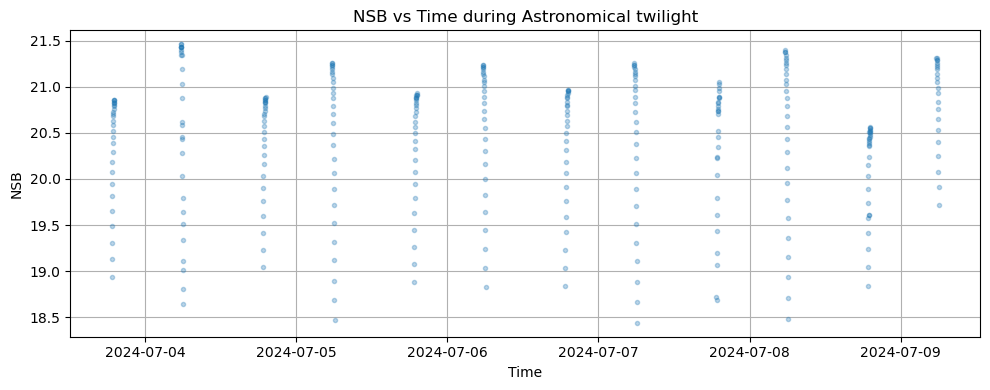

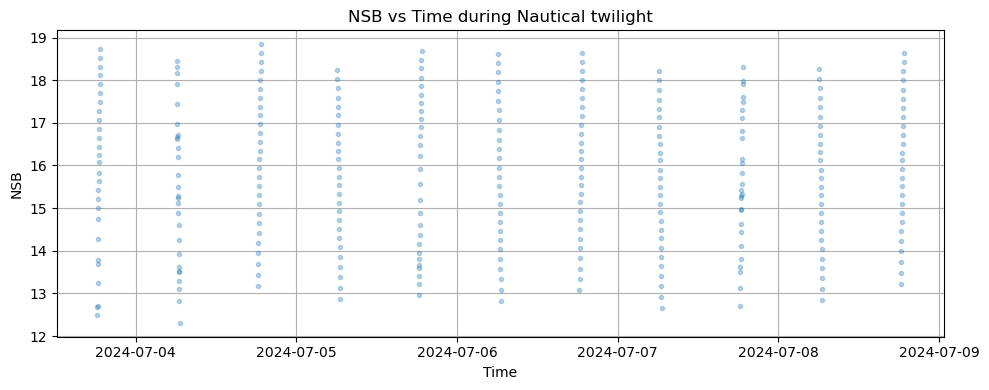

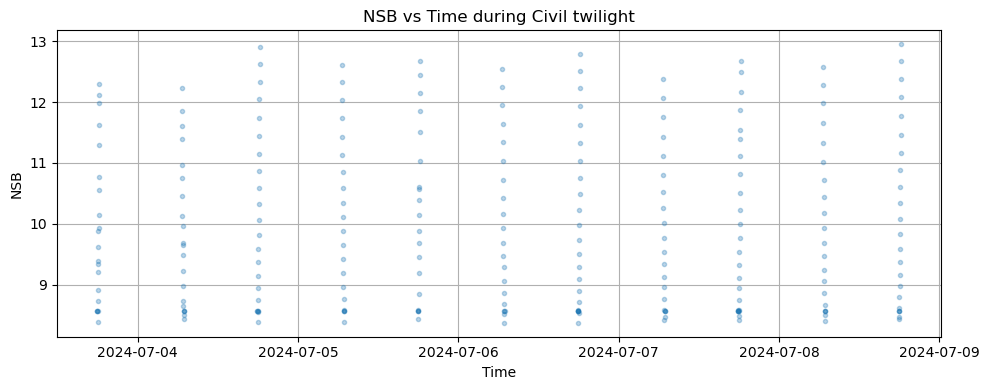

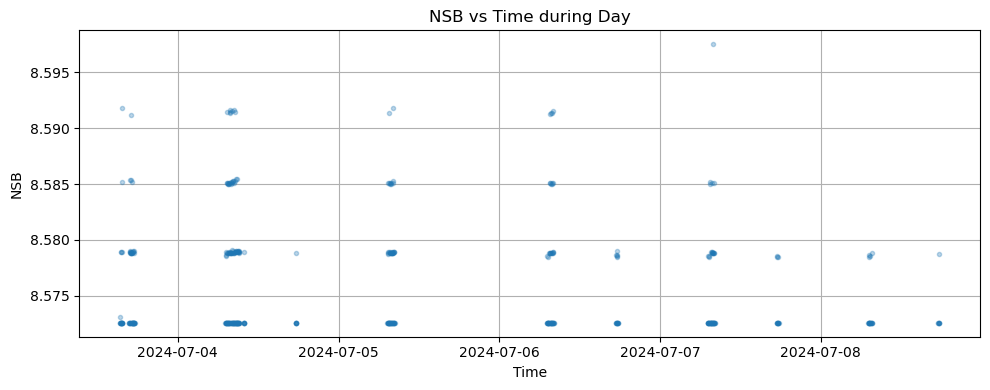

In [161]:
#Visualisation selon l'elevation du Soleil
bins = [-90, -18, -12, -6, 0, 90]
labels = ['Night', 'Astronomical twilight', 'Nautical twilight', 'Civil twilight', 'Day']

cat_type = pd.api.types.CategoricalDtype(categories=labels, ordered=True)

period.loc[:, 'sun_phase'] = pd.cut(period['ALT_SUN'], bins=bins, labels=cat_type.categories, right=False).astype(cat_type)

for phase, group in period.groupby('sun_phase', observed=True):
    plt.figure(figsize=(10, 4))
    plt.plot(group.index, group['NSB'], '.', alpha=0.3)
    plt.title(f"NSB vs Time during {phase}")
    plt.xlabel("Time")
    plt.ylabel("NSB")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

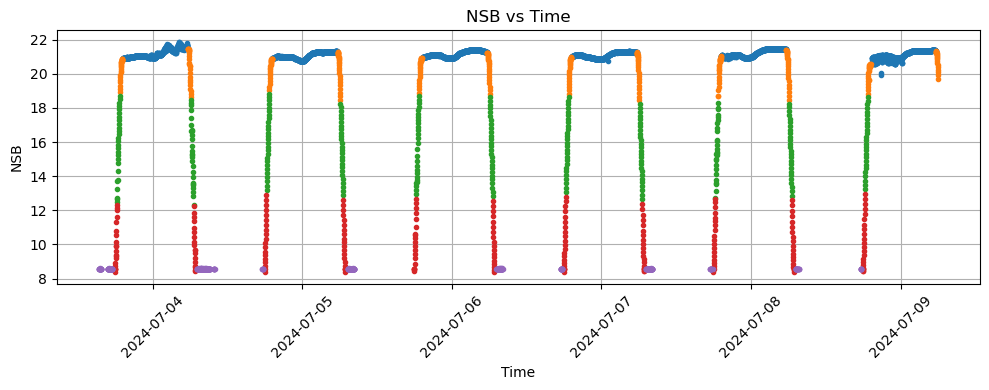

In [162]:
plt.figure(figsize=(10, 4))

for phase, group in period.groupby('sun_phase', observed=True):
    plt.plot(group.index, group['NSB'], '.', label=phase)
    
plt.title("NSB vs Time")
plt.xlabel("Time")
plt.ylabel("NSB")

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
#plt.legend(loc='lower center')
#plt.tight_layout() 
plt.show()

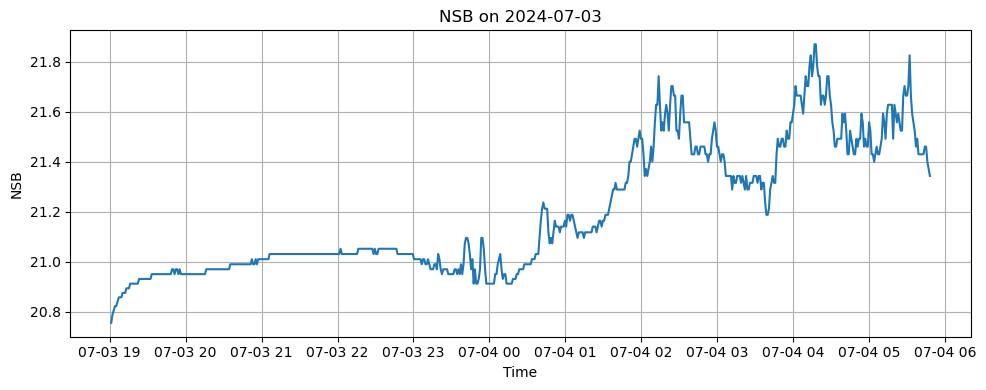

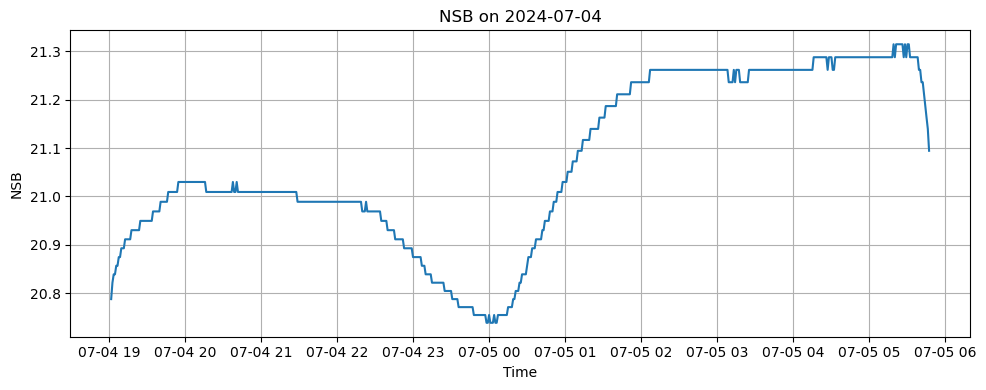

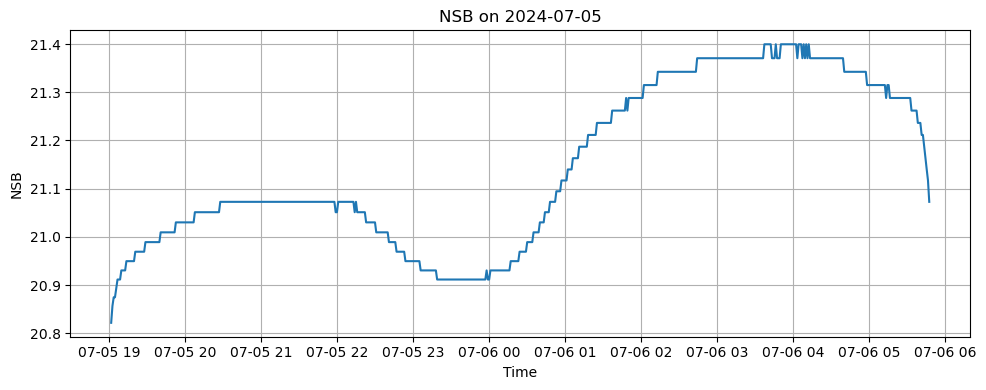

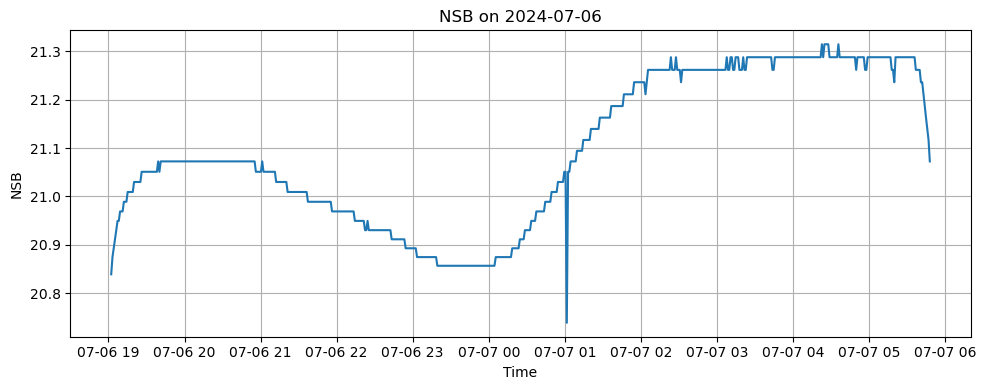

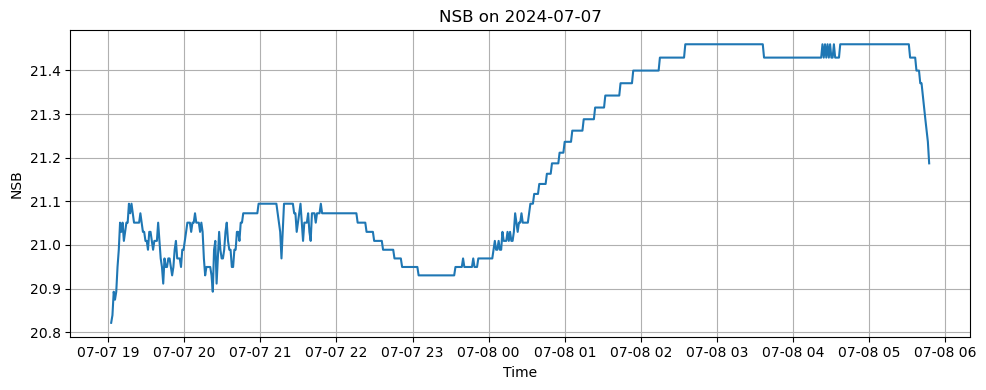

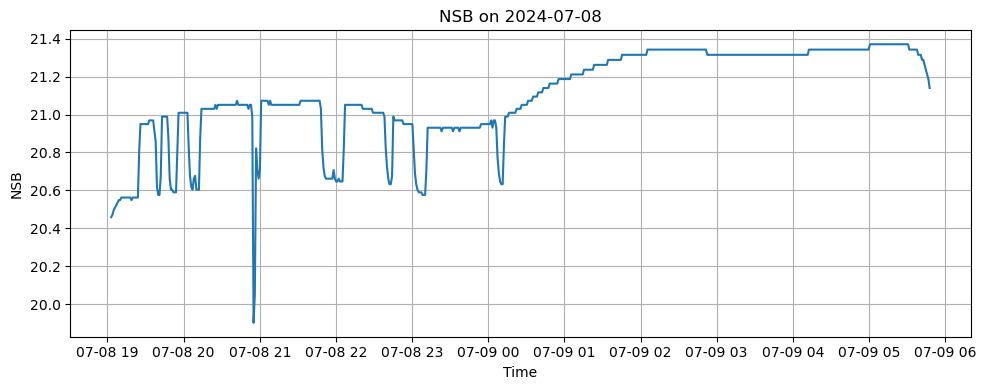

In [163]:
night['night'] = (night.index - pd.Timedelta(hours=6)).date #Creation d'une colonne night de 18h - 6h

#Visualisation de l'evolution du NSB par nuit
for d, g in night.groupby('night'):
    plt.figure(figsize=(10, 4))
    plt.plot(g.index, g['NSB'], label=f"{d}")
    plt.title(f"NSB on {d}")
    plt.xlabel("Time")
    plt.ylabel("NSB")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [164]:
night['night_time'] = ((night.index - pd.to_datetime(night['night'])) / pd.Timedelta(hours=1)) - 18 #Creation de la colonne nuit

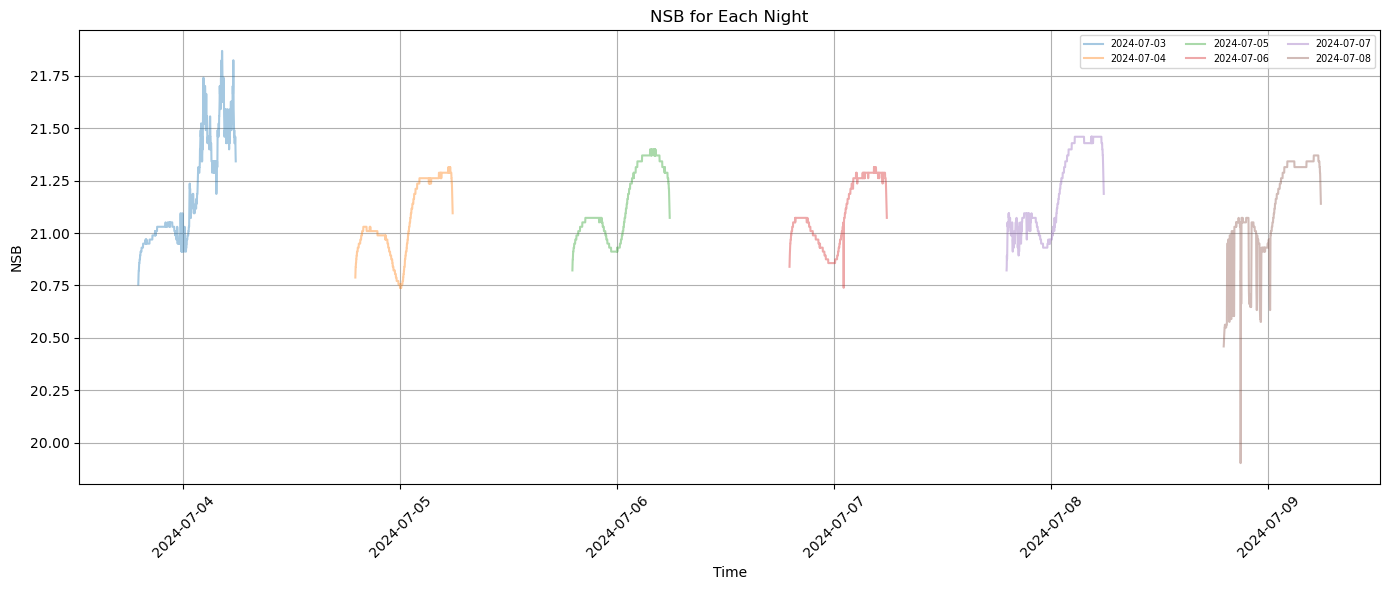

In [165]:
#Visualisation de l'evolution du NSB un seul graph

plt.figure(figsize=(14, 6))

for d, g in night.groupby('night'):
    plt.plot(g.index, g['NSB'], label=str(d), alpha=0.4)

plt.title("NSB for Each Night")
plt.xlabel("Time")
plt.ylabel("NSB")
plt.xticks(rotation=45)
plt.legend(fontsize='x-small', ncol=3, loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

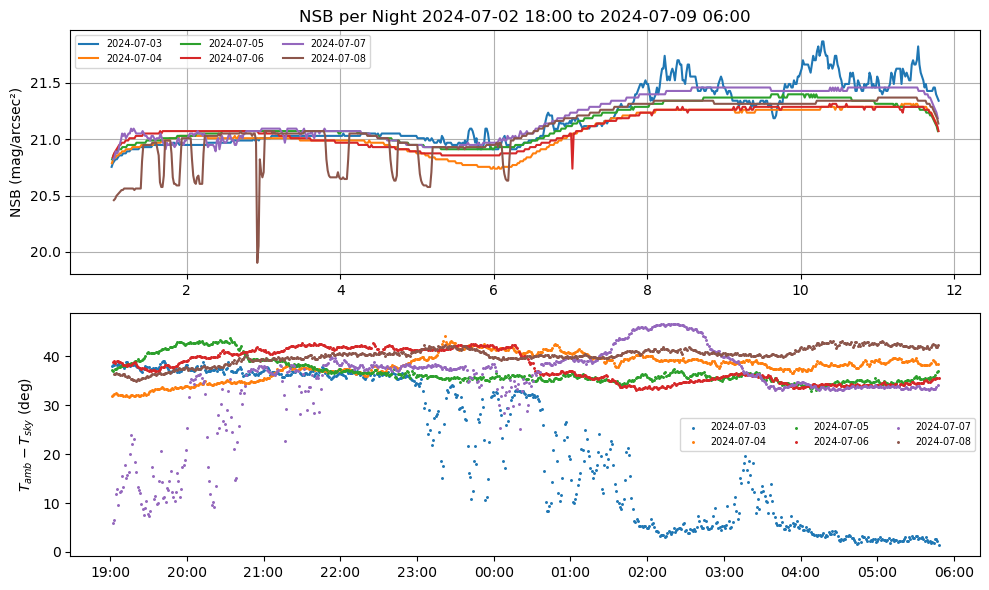

In [173]:
night['night'] = (night.index - pd.Timedelta(hours=6)).date #Creation d'une colonne night de 18h - 6h
night['night_time'] = ((night.index - pd.to_datetime(night['night'])) / pd.Timedelta(hours=1)) - 18 #Creation de la colonne nuit
#Visualisation de l'evolution du NSB par nuit dans un seul graph

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for d, g in night.groupby('night'):
    axes[0].plot(g['night_time'], g['NSB'], label=str(d))
    axes[1].scatter(g['night_time'], g['T_AMB']-g['T_SKY'], marker='.',label=str(d), s=5)

axes[0].set_title(f"NSB per Night {start} to {end}")
#axes[0].set_xlabel("Hours 18:00 to 6")
axes[0].set_ylabel("NSB (mag/arcsec²)")
axes[0].legend(fontsize='x-small', ncol=3)
axes[0].grid(True)


#axes[1].set_title("Temperature")
axes[1].set_ylabel("$T_{amb} - T_{sky}$ (deg)")
axes[1].legend(fontsize='x-small', ncol=3)

# Format x-axis to show HH:MM
def format_hour(x, _):
    hour = int(x + 18) % 24  # shift back to real time
    minute = int((x % 1) * 60)
    return f"{hour:02d}:{minute:02d}"

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # tick every 2 hours
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_hour))

plt.tight_layout()
plt.show()